In [1]:
import numpy as np
import os
from keras import backend as K
import pandas as pd

Using TensorFlow backend.


In [2]:
data_path = os.path.join("/", "data", "km3net")

In [3]:
reco_path = os.path.join(data_path, "reco_files_fitinf")

In [4]:
multi_data_path = os.path.join(data_path, "Xy_multi_data_files")

In [5]:
numu_filep = "km3_v4_numuCC_{}.evt.reco_fitinf.npz"

In [6]:
reco_files_fitinf_numu = [os.path.join(reco_path, numu_filep.format(i + 1)) for i in range(100)]

In [7]:
np.load(reco_files_fitinf_numu[0]).keys()

['beta0', 'E', 'dirz', 'diry', 'dirx', 'lik', 'posz', 'posx', 'posy', 'ren']

In [8]:
from data_files import get_multi_data_files, get_doms_maps

In [9]:
true_data = get_multi_data_files(multi_data_path, merge=False, n_files=100)[0]

In [10]:
doms_map_files_numu = get_doms_maps(multi_data_path, merge=False, n_files=100)[0]

In [11]:
lik = [np.load(reco_files_fitinf_numu[i])["lik"][np.load(doms_map_files_numu[i])["id"]] for i in range(100)]
beta = [np.load(reco_files_fitinf_numu[i])["beta0"][np.load(doms_map_files_numu[i])["id"]] for i in range(100)]

In [65]:
likelihood_tot = np.hstack(lik)

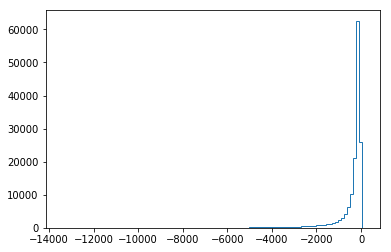

In [71]:
plt.hist(likelihood_tot, bins= 100, histtype="step")
plt.show()

In [266]:
reco_numu_E = [np.load(reco_files_fitinf_numu[i])["ren"] for i in range(100)] 

In [267]:
true_numu_E = [np.load(true_data[i])["E"] for i in range(100)]

In [268]:
reco_numu_E_5doms = [reco_numu_E[i][np.load(doms_map_files_numu[i])["id"]] for i in range(100)]

In [269]:
E_tot = np.hstack(reco_numu_E_5doms)

np.savetxt("reco_numu_E_no_selections.txt", np.hstack(reco_numu_E_5doms))

np.hstack(true_numu_E).shape

np.savetxt("true_numu_E_no_selections.txt", np.hstack(true_numu_E))

In [376]:
best_reco_indices = [np.where(np.logical_and(lik[i]<-60, np.log10(beta[i])<-2.8 ))[0] for i in range(100)]

/home/cdesio/anaconda3/envs/intel/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [377]:
best_reco_E = [reco_numu_E[i][best_reco_indices[i]] for i in range(100)]

In [378]:
best_true_numu_E = [true_numu_E[i][best_reco_indices[i]] for i in range(100)]

In [379]:
np.hstack(best_reco_E).shape

(71137,)

In [380]:
np.hstack(best_true_numu_E).shape

(71137,)

In [308]:
np.savetxt("reco_numu_E_cuts.txt",np.hstack(best_reco_E) )

In [26]:
np.savetxt("true_numu_E_cuts.txt",np.hstack(best_true_numu_E) )

In [381]:
nonz = [np.nonzero(best_reco_E[i])[0] for i in range(100)]

In [382]:
best_reco_E_nonz = [best_reco_E[i][nonz[i]] for i in range(100)]

In [383]:
best_true_numu_E_nonz = [best_true_numu_E[i][nonz[i]] for i in range(100)]

In [384]:
np.hstack(best_reco_E_nonz).shape

(69726,)

In [385]:
np.hstack(best_true_numu_E_nonz).shape

(69726,)

In [386]:
import matplotlib.pyplot as plt
%matplotlib inline

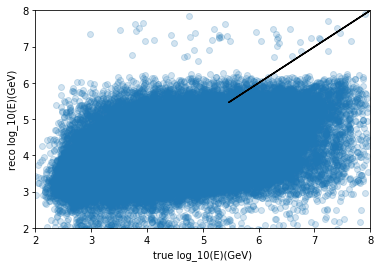

In [387]:
plt.scatter(np.log10(np.hstack(best_true_numu_E_nonz)), np.log10(np.hstack(best_reco_E_nonz)),alpha=0.2)
plt.xlim(2,8)
plt.ylim(2,8)
plt.plot(np.hstack(best_true_numu_E), np.hstack(best_true_numu_E), c="k")
plt.xlabel("true log_10(E)(GeV)")
plt.ylabel("reco log_10(E)(GeV)")

In [400]:
def correct_energy(x):
    logcorrE = ((((((x<=1.0)*x)+(((x>1.0)and(x<=2.8))*(-(7.20045)+(x*3.01))))+(((x>2.8)and(x<=3.5))*(1081.22+(x*(-(1336.46)+(x*(614.871+(x*(-(124.755)+(x*9.43893))))))))))+(((x>3.5)and(x<=4.0))*(-(60.3619)+(x*(45.7012+(x*(-(11.0884)+(x*0.923034))))))))+(((x>4.0)and(x<7.0))*(-(8.72485)+(x*(5.16495+(x*(-(0.174627)+(x*(-(0.198979)+(x*(0.0385912+(x*-(0.00213019)))))))))))))+((x>7.0)*(0.375618+(x*1.01931)))
    return 10**logcorrE

In [401]:
v_correct_energy = np.vectorize(correct_energy)

In [32]:
corrected_no_cuts = v_correct_energy(np.log10(np.hstack(reco_numu_E_5doms)))

/home/cdesio/anaconda3/envs/intel/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/cdesio/anaconda3/envs/intel/lib/python3.6/site-packages/numpy/lib/function_base.py:2815: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [33]:
corrected_no_cuts.shape

(151479,)

In [34]:
np.savetxt("reco_numu_E_corrected_no_cuts.txt", corrected_no_cuts)

In [402]:
corrected = v_correct_energy(np.log10(np.hstack(best_reco_E_nonz)))

In [391]:
corrected_true = v_correct_energy(np.log10(np.hstack(best_true_numu_E_nonz)))

np.savetxt("reco_numu_E_corrected_cuts.txt", corrected)

In [406]:
corrected[:10]

array([ 533.07557198,   23.14745147,  205.29596476,  976.57883   ,
        432.11287951,  144.00852465,  408.82976817,  437.68244037,
         19.00778846,  900.25251887])

In [410]:
np.hstack(best_true_numu_E_nonz)[:10]

array([  280.123,   466.99 ,   342.447,   391.815,   302.908,   340.857,
        1007.58 ,   507.985,   973.92 ,   727.914])

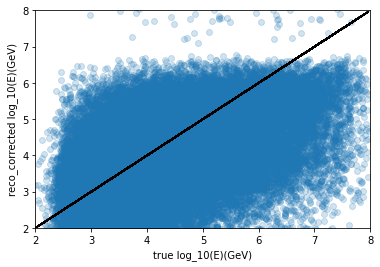

In [414]:
plt.scatter(np.log10(np.hstack(best_true_numu_E_nonz)), np.log10(corrected), alpha=0.2)
plt.xlim(2,8)
plt.ylim(2,8)
plt.plot(np.log10(np.hstack(best_true_numu_E_nonz)), np.log10(np.hstack(best_true_numu_E_nonz)), c="k")
plt.xlabel("true log_10(E)(GeV)")
plt.ylabel("reco_corrected log_10(E)(GeV)")

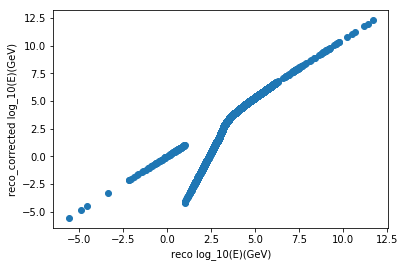

In [393]:
plt.scatter(np.log10(np.hstack(best_reco_E_nonz)), v_correct_energy(np.log10(np.hstack(best_reco_E_nonz))))
#plt.xlim(2,8)
#plt.ylim(2,8)
plt.xlabel("reco log_10(E)(GeV)")
plt.ylabel("reco_corrected log_10(E)(GeV)")

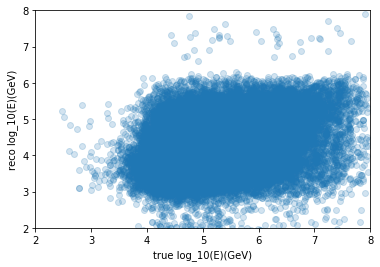

In [353]:
plt.scatter(np.log10(np.hstack(best_true_numu_E_nonz)), np.log10(np.hstack(best_reco_E_nonz)),alpha=0.2)
plt.xlim(2,8)
plt.ylim(2,8)
plt.plot(np.hstack(best_true_numu_E), np.hstack(best_true_numu_E), c="k")
plt.xlabel("true log_10(E)(GeV)")
plt.ylabel("reco log_10(E)(GeV)")

Trying to make confidence levels plots

In [354]:
true_E = np.hstack(best_true_numu_E_nonz)

In [395]:
reco_E = np.hstack(best_reco_E_nonz)

In [396]:
reco_E_corrected = v_correct_energy(np.log10(reco_E))

In [397]:
print(true_E.shape, reco_E.shape, reco_E_corrected.shape)

(34004,) (69726,) (69726,)


In [358]:
en_true_reco = [(np.log10(et), np.log10(er)) for et,er in zip(true_E, reco_E) if er > 0]

In [359]:
en_reco_true = [(np.log10(er), np.log10(et)) for et,er in zip(true_E, reco_E) if er > 0]

In [360]:
en_true_reco_corr = [(np.log10(et), er) for et,er in zip(true_E, reco_E_corrected) if er > 0]

In [361]:
en_reco_true_corr = [(er, np.log10(et)) for et,er in zip(true_E, reco_E_corrected) if er > 0]

In [362]:
def binbounds(lsval, binmin, binmax, clev):
    odata = [(x[1]-x[0]) for x in lsval if binmin <= x[0] < binmax]
    excluded = int(np.floor((1.0 - clev) * len(odata) * 0.5))
    odata.sort()    
    return (0.5*(binmax+binmin),odata[excluded],odata[-excluded])

In [363]:
def plot_performances(values_list, range_ext_1, range_ext_2, coeff = 0.5,  xlabel="True log(Energy(GeV))", ylabel="Predicted log(Energy(GeV))"):
    plt.figure(figsize=(9,7))
    cl_68_nn = [binbounds(values_list,x*coeff,(x+1)*coeff,0.68) for x in range(range_ext_1,range_ext_2)]
    cl_90_nn = [binbounds(values_list,x*coeff,(x+1)*coeff,0.90) for x in range(range_ext_1,range_ext_2)]
    median_nn = [binbounds(values_list,x*coeff,(x+1)*coeff,0) for x in range(range_ext_1,range_ext_2)]

    line_68_1 = plt.plot([x[0] for x in cl_68_nn],[x[1]+x[0] for x in cl_68_nn],"steelblue", label="68% confidence level", alpha=1)
    line_68_2 = plt.plot([x[0] for x in cl_68_nn],[x[2]+x[0] for x in cl_68_nn],"steelblue", alpha=1)
    line_90_1 = plt.plot([x[0] for x in cl_90_nn],[x[1]+x[0] for x in cl_90_nn],"lightslategray", label="90% confidence level",alpha=1)
    line_90_2 = plt.plot([x[0] for x in cl_90_nn],[x[2]+x[0] for x in cl_90_nn],"lightslategray",alpha=1)
    median = plt.plot([x[0] for x in median_nn],[x[2]+x[0] for x in median_nn],"k", label="median")
    regr_line = plt.plot([2,8],[2,8],"r", label="true")

    plt.fill_between([x[0] for x in cl_68_nn], [x[1]+x[0] for x in cl_68_nn], [x[2]+x[0] for x in cl_68_nn],
                color='cornflowerblue',alpha=0.7)
    plt.fill_between([x[0] for x in cl_90_nn], [x[1]+x[0] for x in cl_90_nn], [x[2]+x[0] for x in cl_90_nn],
                color='lightsteelblue',alpha=0.7)


    #plt.scatter([x[0] for x in values_list], [x[1] for x in values_list], s=1, 
    #            marker='o', color='black', edgecolor='k', alpha=0.2)
    plt.minorticks_on()
    plt.xlim(2,8)
    plt.legend(loc="lower right")
    plt.grid(b=True, which='both', color='0.65', linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return

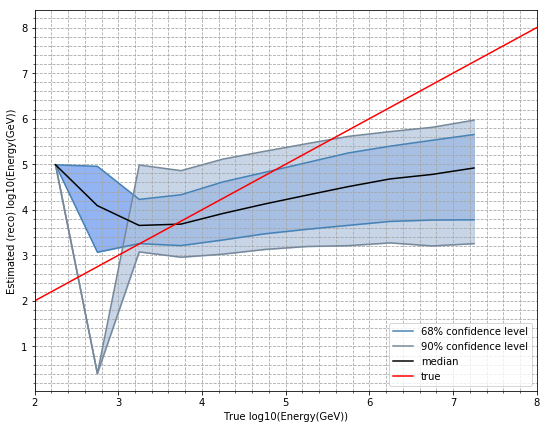

In [364]:
plot_performances(en_true_reco, 4, 15, coeff=0.5, 
                  ylabel="Estimated (reco) log10(Energy(GeV))", 
                  xlabel="True log10(Energy(GeV))")

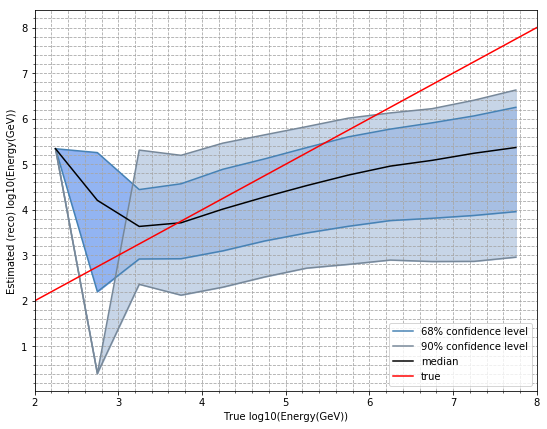

In [365]:
plot_performances(en_true_reco_corr, 4, 16, coeff=0.5, 
                  ylabel="Estimated (reco) log10(Energy(GeV))", 
                  xlabel="True log10(Energy(GeV))")

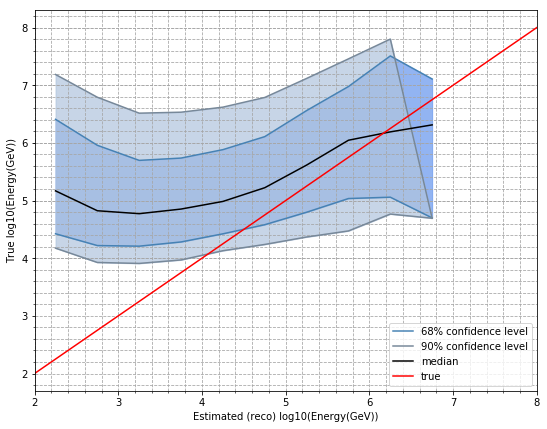

In [366]:
plot_performances(en_reco_true, 4, 14, coeff=0.5, 
                  xlabel="Estimated (reco) log10(Energy(GeV))", 
                  ylabel="True log10(Energy(GeV))")

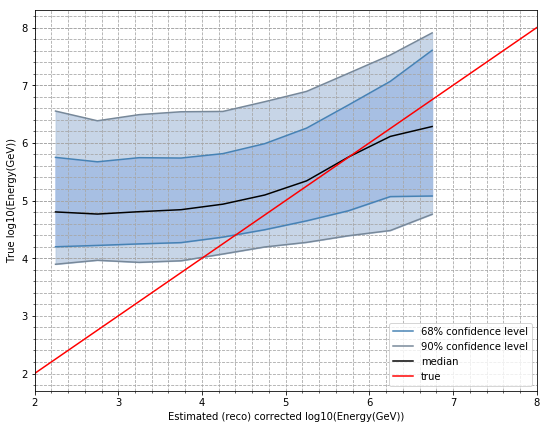

In [367]:
plot_performances(en_reco_true_corr, 4, 14, coeff=0.5, 
                  xlabel="Estimated (reco) corrected log10(Energy(GeV))", 
                  ylabel="True log10(Energy(GeV))")